# Project: Deep Reinforcement Learning - FrozenLake Environment
**Author:** Sayed Pedram Haeri Boroujeni  
**Position:** PhD Student, Clemson University  
**Affiliation:** Department of Computer Science  
**Email:** shaerib@g.clemson.edu  
**Date Created:** June 10, 2025  
**Last Updated:** June 15, 2025 

In [1]:
import gym

In [2]:
env = gym.make("FrozenLake-v1")

## Customize Environment
When you instantiate the FrozenLake-v1 environment with gym.make(...), you can customize its behavior via 3 keyword arguments as follows: 

- **map_name**: 
  
  We can choose the size of environment using map_name, where there are two options "4x4" and "8x8". If we do not put it as the input of gym.make, the default is "4x4".
  - "4x4" → 16 total states (4 rows × 4 columns)
  - "8x8" → 64 total states (8 rows × 8 columns) 
  - You can also supply your own custom map by passing a desc list of strings.

<br>

<div style="display: flex; gap: 10px; align-items: flex-start;">
  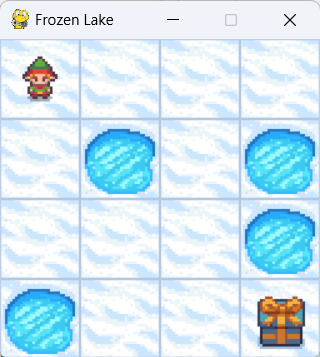
  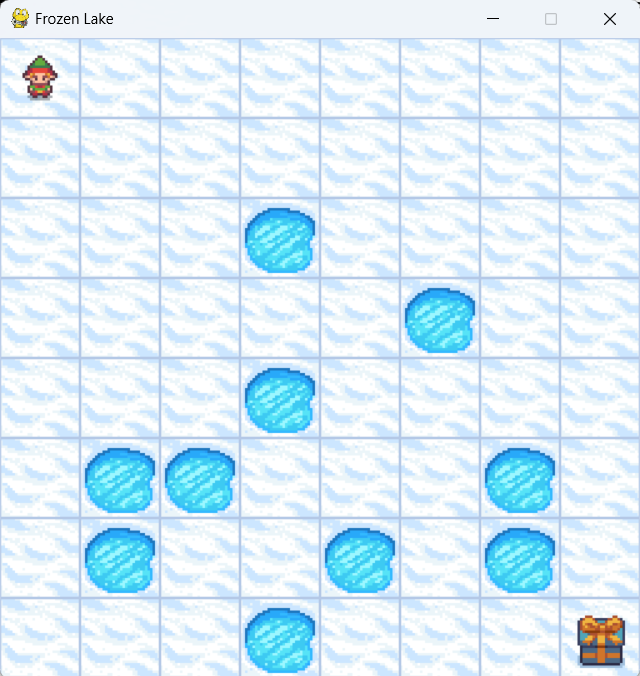
</div>

<br>

- **is_slippery**: 
  
  We can choose the behavior of the environment using is_slippery, where there are two options True and False, where make a stochatsic and deterministic environment, respectively. If we do not put it as the input of gym.make, the default is True.
  - True: Each action carries a chance of slipping left or right, creating a nondeterministic Markov process.
  - False: Each action moves the agent exactly one tile in the intended direction (unless blocked by an edge).

<br>

- **render_mode**: 
  
  When you construct most Gym environments, you can pass a render_mode argument, where there are three options "human", "rgb_array", and "ansi". In "human" mode, it will create a window/context (using Pygame) and draw the current timestep’s graphics into it. This mode usually does not return any numerical value (i.e. returns None), because the main point is drawing this frame to the screen. The above two windows come from "human" render mode. In "rgb_array" mode, it will render offscreen into a pixel buffer, then return that buffer to you as a NumPy array of pixel values (usually shape (height, width, 3)). In "ansi" mode (for toy‐text environments like FrozenLake or Blackjack), it will compose a multi‐line string (e.g. a 4×4 grid of “S, F, H, G” characters for FrozenLake) and return an ASCII/text representationit. If we do not put the render mode as the input of gym.make, it often tries to fall back to "human"—but newer Gym versions (0.26+) will complain if you did not explicitly pick a valid mode at creation time.
  - "human": Opens a small Pygame/SDL window and draws each tile (ice, hole, goal, agent) in real time.
  - "rgb_array": Returns an np.ndarray of shape (H, W, 3) depicting the current frame’s RGB pixel values.
  - "ansi": Returns a multi-line string representing the 2D grid with letters (S F H G). Useful for logging or console output.
  

We can customize the FrozenLake environment as follows:

In [3]:
env = gym.make("FrozenLake-v1", map_name = "8x8", is_slippery = False, render_mode="human")

In [4]:
print("State Space:", env.observation_space)
print("Action Space:", env.action_space)
print("State Number:",env.observation_space.n)
print("Action Number:", env.action_space.n)

State Space: Discrete(64)
Action Space: Discrete(4)
State Number: 64
Action Number: 4


## Transition Dynamics:

- **env.P**: It returns the full transition‐dynamics dictionary for FrozenLake. It maps every possible (state, action) pair to a list of possible outcomes. How to read it? Top‐level keys are each of the 16 states (0 through 15). Second‐level keys are the 4 possible actions (0–3). Values are lists of tuples (probability, next_state, reward, done). If is_slippery=False, each list has exactly one tuple with probability = 1.0, because transitions are deterministic. If is_slippery=True, you may see multiple tuples (e.g. slipping “left” or “right” accidentally), each with its own probability. By inspecting env.P directly, you can fully understand or even visualize the Markov-chain dynamics of FrozenLake before training an agent.

- **env.P[state][action]**: It returns transition‐dynamics for a specific state and action. If is_slippery=False, each (state, action) pair is deterministic, so the list will have exactly one tuple.

We can see the transition‐dynamics as follows: 

In [5]:
print("Transition Matrix:", env.P)
print(f"............................................................................................")
print("Specific Transition Matrix:", env.P[3][1])

Transition Matrix: {0: {0: [(1.0, 0, 0.0, False)], 1: [(1.0, 8, 0.0, False)], 2: [(1.0, 1, 0.0, False)], 3: [(1.0, 0, 0.0, False)]}, 1: {0: [(1.0, 0, 0.0, False)], 1: [(1.0, 9, 0.0, False)], 2: [(1.0, 2, 0.0, False)], 3: [(1.0, 1, 0.0, False)]}, 2: {0: [(1.0, 1, 0.0, False)], 1: [(1.0, 10, 0.0, False)], 2: [(1.0, 3, 0.0, False)], 3: [(1.0, 2, 0.0, False)]}, 3: {0: [(1.0, 2, 0.0, False)], 1: [(1.0, 11, 0.0, False)], 2: [(1.0, 4, 0.0, False)], 3: [(1.0, 3, 0.0, False)]}, 4: {0: [(1.0, 3, 0.0, False)], 1: [(1.0, 12, 0.0, False)], 2: [(1.0, 5, 0.0, False)], 3: [(1.0, 4, 0.0, False)]}, 5: {0: [(1.0, 4, 0.0, False)], 1: [(1.0, 13, 0.0, False)], 2: [(1.0, 6, 0.0, False)], 3: [(1.0, 5, 0.0, False)]}, 6: {0: [(1.0, 5, 0.0, False)], 1: [(1.0, 14, 0.0, False)], 2: [(1.0, 7, 0.0, False)], 3: [(1.0, 6, 0.0, False)]}, 7: {0: [(1.0, 6, 0.0, False)], 1: [(1.0, 15, 0.0, False)], 2: [(1.0, 7, 0.0, False)], 3: [(1.0, 7, 0.0, False)]}, 8: {0: [(1.0, 8, 0.0, False)], 1: [(1.0, 16, 0.0, False)], 2: [(1.0, 9

## Move in Environment:

- **env.reset()**: It brings the environment back to its start state and returns the initial observation (and optionally extra info). It actually starts a new episode for the agent.

- **env.action_space.sample()**: It draws a single action chosen uniformly at random from all valid actions, which will be an integer in the range (0, 1, 2, or 3) for FrozenLake. 

- **env.step(action)**: It advances the environment by one timestep: it returns the next observation, the scalar reward, a boolean flag (True or False) indicating if the episode ended because the agent reached a terminal state (e.g., fell into a hole or reached the goal), a boolean flag indicating if the episode was cut short by a built‐in time limit or other truncation condition (e.g., max steps reached), and an info dict for diagnostics.

- **env.render()**: It—if you ask for “human” mode—will open a little GUI window (Pygame/SDL/GL) and draw the current state; if you ask for "rgb_array", it returns a NumPy array of pixel data; if you ask for "ansi" (text environments), it returns a string you can print.

- **env.close()**: It closes any network connections, file handles, or—in GUI mode—the window that render() created. You do need to call it at the end if you opened a window (so that the GUI shuts down properly). If you fail to call it, you may leave a dangling window or other resources. If you’re using a purely text‐based environment (e.g. FrozenLake with render_mode="ansi"), there’s no window, but it’s still good practice to call env.close() after you finish.

We can move through the environement as follows: 

In [6]:
env.reset()
env.render()
print(env.step(1))
print(env.step(env.action_space.sample()))

2025-06-11 00:28:46.688 python[2643:88031] +[IMKClient subclass]: chose IMKClient_Modern
2025-06-11 00:28:46.689 python[2643:88031] +[IMKInputSession subclass]: chose IMKInputSession_Modern


(8, 0.0, False, False, {'prob': 1.0})
(8, 0.0, False, False, {'prob': 1.0})


In [7]:
env.close()

## Record Agent's Movement in Environment:

- **state, info_ini = env.reset()**: state records the initial observation (state) that the agent sees at each episode, where it is always the state S "0" for FrozenLake environment. info_ini can contain environment-specific details, such as random seed usage or additional reset metadata.

- **random_action = env.action_space.sample()**: random_action records the drawn action.

- **next_state, reward, terminated, truncated, info = env.step(random_action)**: next_state records the new observation (state) after applying random_action. reward records a scalar value given by the environment for the transition. Once terminated=True, no further steps in this episode should be taken. If truncated=True, the episode ends even though it may not have reached a true terminal state. info is a dictionary containing environment‐specific diagnostic information about the step.

In [8]:
env = gym.make("FrozenLake-v1", map_name = "8x8", is_slippery = False, render_mode="human")

state, info_ini = env.reset()
env.render()
random_action = env.action_space.sample()
next_state, reward, terminated, truncated, info = env.step(random_action)
print(state, info_ini)
print(f"  → state={next_state}, reward={reward}, terminated={terminated}, truncated={truncated}, info={info}")

0 {'prob': 1}
  → state=1, reward=0.0, terminated=False, truncated=False, info={'prob': 1.0}


In [9]:
env.close()

## Familiarize with Environment:

Now, it is a good time for you to play with the options and see the results. For instance, you can consider the following options:

In [10]:
env = gym.make("FrozenLake-v1", map_name = "4x4", is_slippery = True, render_mode="ansi")

print(env.observation_space)
print(env.action_space)
print(env.observation_space.n)
print(env.action_space.n)
#print(env.P)
#print(env.P[3][1])

Discrete(16)
Discrete(4)
16
4


In [11]:
state, info_ini = env.reset()
env.render()
random_action = env.action_space.sample()
next_state, reward, terminated, truncated, info = env.step(random_action)
print(state, info_ini)
print(f"  → state={next_state}, reward={reward}, terminated={terminated}, truncated={truncated}, info={info}")

0 {'prob': 1}
  → state=0, reward=0.0, terminated=False, truncated=False, info={'prob': 0.3333333333333333}


## Episode: 

An episode (sometimes called a trajectory or rollout) refers to a full sequence of interactions between an agent and its environment, from a starting state until a terminal condition is reached. During each episode:

- **Initialization**: 
  - The environment is reset to an initial state via env.reset().
  - The agent receives an initial observation (state) and may sample or compute an initial action.
  
- **Step Loop**: 
  - At every timestep, the agent selects an action based on its current policy (can be a random policy).
  - The environment processes that action via env.step() and returns the feedback.
  
- **Termination**:
  - The episode ends when the environment signals a terminal state (e.g., the agent has reached a goal, fallen into a failure state, or exceeded a maximum number of steps).

After termination, one typically starts a new episode by calling env.reset() again, and the process repeats until the desired number of episodes (or total timesteps) has been collected.

In the following code, we consider 5 episodes to see the agent's movement in the environment. We have ascii_map = env.unwrapped._render_text() to also show the movement in the environment using grids.

In [12]:
import gym
import time

env = gym.make("FrozenLake-v1", map_name = "4x4", is_slippery = True, render_mode="human")

episode_number = 5

for i in range(episode_number):
    
    print(f"..... Episode {i+1} is started ........")
    
    state, info_ini = env.reset()
    
    print(f"  → state={state}, info={info_ini}")
    
    while True:
        
        env.render()
        
        ascii_map = env.unwrapped._render_text()
        print(ascii_map)
        
        action = env.action_space.sample()
        next_state, reward, terminated, truncated, info = env.step(action)
        
        print(f"  → action={action}, state={next_state}, reward={reward}, terminated={terminated}, truncated={truncated}")
                
        time.sleep(0.3)
                                
        if terminated or truncated:
            break
            
env.close()

..... Episode 1 is started ........
  → state=0, info={'prob': 1}

SFFF
FHFH
FFFH
HFFG

  → action=2, state=0, reward=0.0, terminated=False, truncated=False
  (Right)
SFFF
FHFH
FFFH
HFFG

  → action=3, state=1, reward=0.0, terminated=False, truncated=False
  (Up)
SFFF
FHFH
FFFH
HFFG

  → action=3, state=1, reward=0.0, terminated=False, truncated=False
  (Up)
SFFF
FHFH
FFFH
HFFG

  → action=0, state=5, reward=0.0, terminated=True, truncated=False
..... Episode 2 is started ........
  → state=0, info={'prob': 1}

SFFF
FHFH
FFFH
HFFG

  → action=1, state=1, reward=0.0, terminated=False, truncated=False
  (Down)
SFFF
FHFH
FFFH
HFFG

  → action=2, state=1, reward=0.0, terminated=False, truncated=False
  (Right)
SFFF
FHFH
FFFH
HFFG

  → action=2, state=2, reward=0.0, terminated=False, truncated=False
  (Right)
SFFF
FHFH
FFFH
HFFG

  → action=2, state=6, reward=0.0, terminated=False, truncated=False
  (Right)
SFFF
FHFH
FFFH
HFFG

  → action=2, state=2, reward=0.0, terminated=False, truncated=